In [1]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../../data/PEACH/hr_neighbors_prev.csv").drop_duplicates(["time", "mac"])

print "total number of lines =", len(df)

excluded_macs = ["00-17-0d-00-00-b0-00-cc",
                 "00-17-0d-00-00-b0-00-aa",
                 "00-17-0d-00-00-b0-00-87"]

df_clean = df[(df.numTxPackets > 0) & (df.numTxFailures >= 0) & (df.rssi < 0)
              & (~df.mac.isin(excluded_macs)) & (~df.neighborMac.isin(excluded_macs)) 
             ]

df_clean.loc[:, 'pdr'] = pd.Series(
                            (df_clean.numTxPackets - df_clean.numTxFailures) / df_clean.numTxPackets,
                            index = df_clean.index
                        )

lines_removed = len(df) - len(df_clean)

print "number of lines left = ", len(df_clean), "(", float(len(df_clean))*100/len(df), "% )"
print "number of lines removed = ", lines_removed, "(", float(lines_removed)*100/len(df), "% )"

#df_clean.head()

total number of lines = 140897
number of lines left =  69643 ( 49.4283057837 % )
number of lines removed =  71254 ( 50.5716942163 % )


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


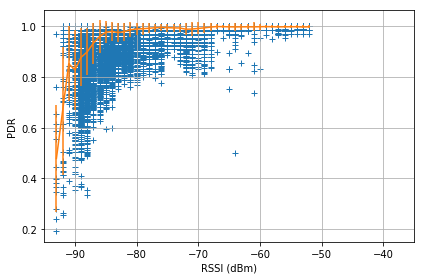

In [7]:
df_indexed = df_clean.set_index(df_clean["rssi"])

df_grouped = df_indexed.groupby(["rssi"])

mean_index = [name for name, group in df_grouped]
mean_pdr   = [group.pdr.mean() for name, group in df_grouped]
std_pdr    = [group.pdr.std() for name, group in df_grouped]

plt.plot(df_indexed.rssi, df_indexed.pdr, '+', zorder=0)
plt.errorbar(mean_index, mean_pdr, std_pdr, capthick=3)

plt.xlabel('RSSI (dBm)')
plt.ylabel('PDR')
plt.xlim([-95, -35])
plt.tight_layout()
plt.axis()

plt.grid(True)

plt.savefig("../../figures/waterfall_agri.png", format='png', bbox_inches='tight', pad_inches=0)
plt.show()